## Exploration - Time Series Datasets

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from acquire import stores_items_sales_data
from prepare import prep_sales
from acquire import get_opsd
from prepare import prep_opsd

#### Sales Datset

In [2]:
df = stores_items_sales_data()
df = prep_sales(df)
df.head()

Reading from csv file...
Reading from csv file...
Reading from csv file...


,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,01-Jan,2-Tuesday,10.92
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,01-Jan,2-Tuesday,218.40
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,01-Jan,2-Tuesday,125.55
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,01-Jan,2-Tuesday,453.60
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,01-Jan,2-Tuesday,294.00


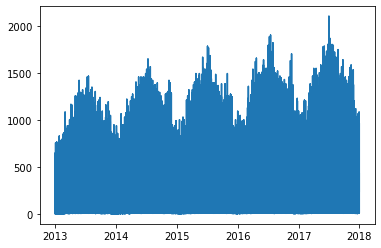

In [3]:
plt.plot(df.index, df.sales_total)

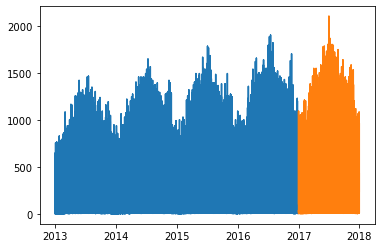

In [6]:
train = df.loc[:'2016']
test = df.loc['2017']
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

<AxesSubplot:ylabel='Frequency'>

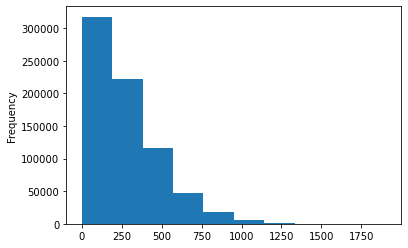

In [7]:
train.sales_total.plot.hist()

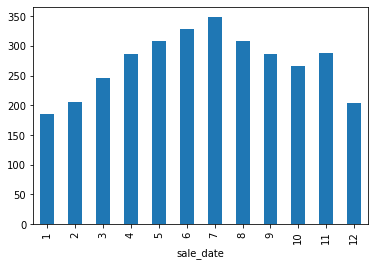

In [8]:
ax = train.groupby(train.index.month).sales_total.mean().plot.bar()

<AxesSubplot:xlabel='day_of_week'>

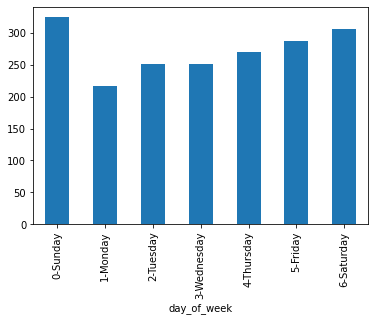

In [9]:
train.groupby('day_of_week').sales_total.mean().plot.bar()

In [10]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
2013-01-01    294.00
Name: sales_total, dtype: float64

<AxesSubplot:xlabel='sale_date'>

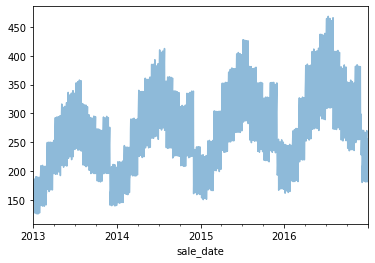

In [14]:
#mean sales by day
y.resample('D').mean().plot(alpha=.5, label='Daily')

<AxesSubplot:xlabel='sale_date'>

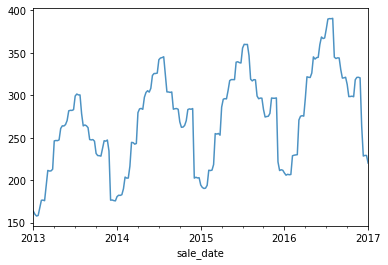

In [13]:
#mean sales by week
y.resample('W').mean().plot(alpha=.8, label='Weekly')

<AxesSubplot:xlabel='sale_date'>

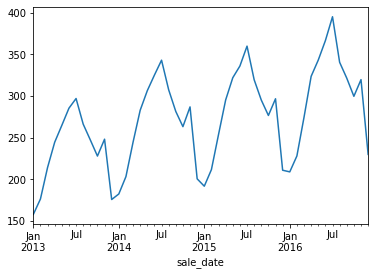

In [12]:
#mean sales by month
y.resample('M').mean().plot(label='Montly')

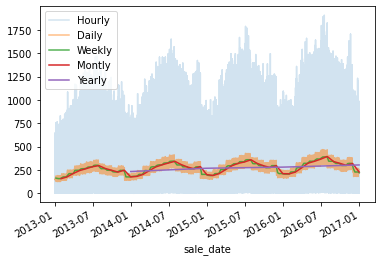

In [11]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

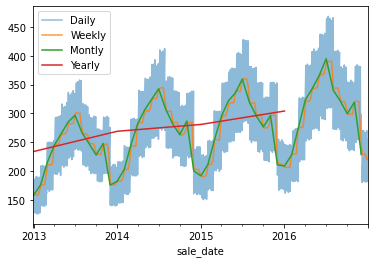

In [15]:
#mean sales by day compared to mean sales by week compared to mean sales by month compared to mean sales by year
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

[Text(0.5, 1.0, 'Total sales over time')]

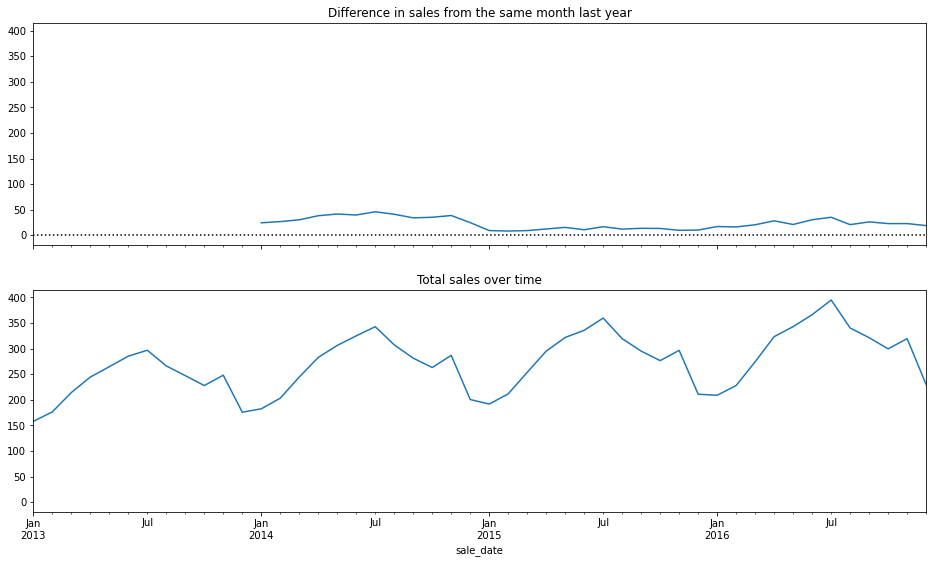

In [16]:
#difference between same month last year and total sales over time for comparison
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(16, 9))

ax = y.resample('M').mean().diff(12).plot(ax=ax1)
ax1.hlines(0, *ax1.get_xlim(), color='black', ls=':')
ax1.set(title='Difference in sales from the same month last year')

y.resample('M').mean().plot(ax=ax2)
ax2.set(title='Total sales over time')

<AxesSubplot:xlabel='sale_date'>

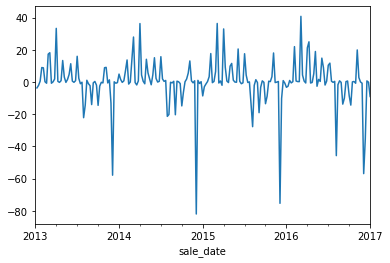

In [17]:
#week over week change over time (difference between the mean sales from this week 
#compared to the mean sales from last week)
y.resample('W').mean().diff().plot()

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

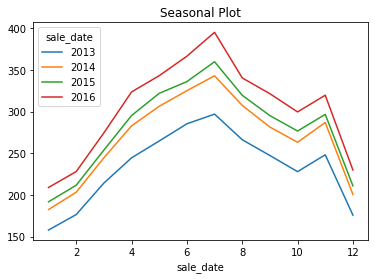

In [18]:
#seasonal plot compares each 'season' to each other, in this case it is mean sales year by year
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

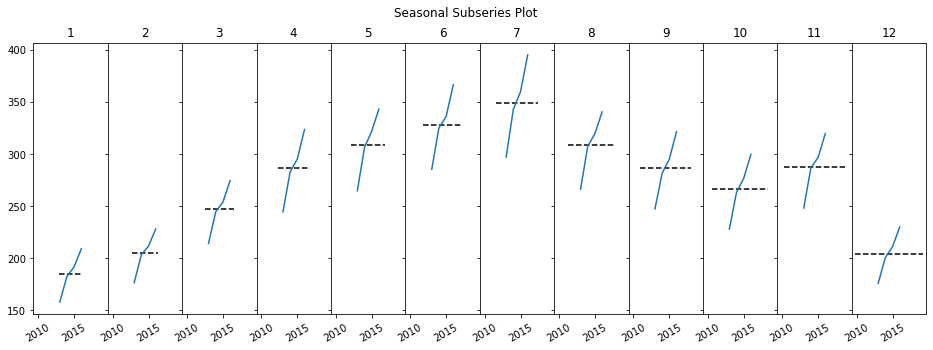

In [19]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(16, 5))

for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
# fig.tight_layout()
fig.subplots_adjust(wspace=0)

---

#### OPS Dataset

In [2]:
df = get_opsd()
df = prep_opsd(df)
df.head()

Reading from .csv


,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006
2006-01-02,1380.521,0.0,0.0,0.0,01-Jan,2006
2006-01-03,1442.533,0.0,0.0,0.0,01-Jan,2006
2006-01-04,1457.217,0.0,0.0,0.0,01-Jan,2006
2006-01-05,1477.131,0.0,0.0,0.0,01-Jan,2006


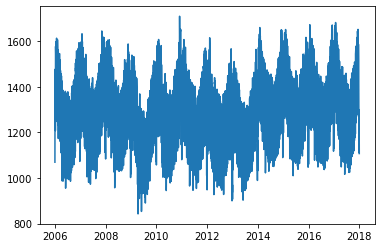

In [21]:
plt.plot(df.index, df.Consumption)

In [22]:
df.shape

(4383, 6)

In [3]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)
test_start_index

3068

In [4]:
train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end
train.shape, test.shape

((3068, 6), (1315, 6))

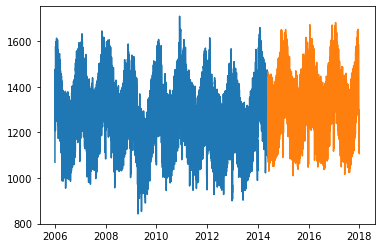

In [5]:
plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

<AxesSubplot:ylabel='Frequency'>

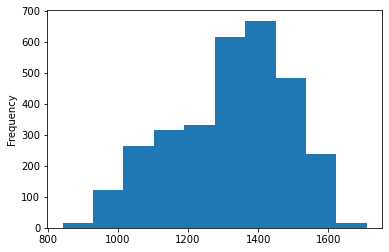

In [28]:
train.Consumption.plot.hist()

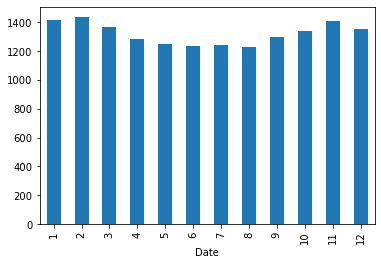

In [30]:
ax = train.groupby(train.index.month).Consumption.mean().plot.bar()

In [33]:
#create a column with data from the previous day representing 'lag'
train['y(t + 1)'] = train.Consumption.shift(-1)
train.head()

/var/folders/n7/fjb2f8gd5jg17xlxz1c85vhc0000gn/T/ipykernel_46887/2474348741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y(t + 1)'] = train.Consumption.shift(-1)


,Consumption,Wind,Solar,Wind+Solar,month,year,y(t + 1)
Date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006,1380.521
2006-01-02,1380.521,0.0,0.0,0.0,01-Jan,2006,1442.533
2006-01-03,1442.533,0.0,0.0,0.0,01-Jan,2006,1457.217
2006-01-04,1457.217,0.0,0.0,0.0,01-Jan,2006,1477.131
2006-01-05,1477.131,0.0,0.0,0.0,01-Jan,2006,1403.427


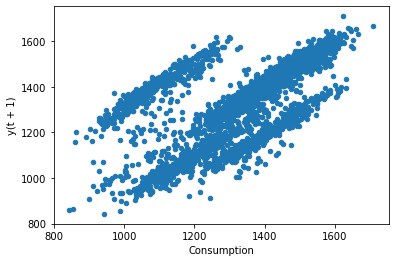

In [34]:
#lag Plot
ax = train.plot.scatter(x='Consumption', y='y(t + 1)')

,this_week,Wind,Solar,Wind+Solar,the_next_week
Date,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1381.300143
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1486.730286
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1490.031143
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1514.176857
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1501.403286
...,...,...,...,...,...
2014-05-04,1295.405714,52.989714,110.741857,163.731571,1372.166000
2014-05-11,1372.166000,204.100143,124.597143,328.697286,1372.636143
2014-05-18,1372.636143,117.518286,131.462000,248.980286,1357.924714


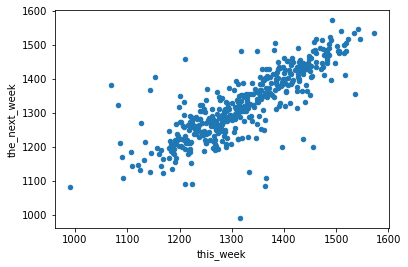

In [6]:
#lag by week
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.Consumption.shift(-1)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,this_week,Wind,Solar,Wind+Solar,12_weeks_out
Date,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1376.688714
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1354.122000
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1347.883429
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1265.716143
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1231.136143
...,...,...,...,...,...
2014-05-04,1295.405714,52.989714,110.741857,163.731571,NaN
2014-05-11,1372.166000,204.100143,124.597143,328.697286,NaN
2014-05-18,1372.636143,117.518286,131.462000,248.980286,NaN


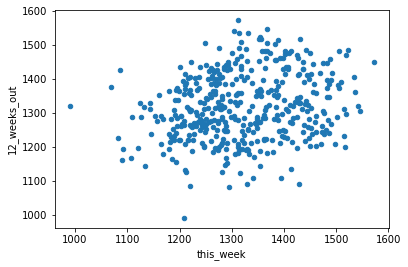

In [7]:
#lag by 12 weeks
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.Consumption.shift(-12)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,Wind,Solar,Wind+Solar,half_a_year_later
Date,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,1254.896857
2006-01-08,1381.300143,0.000000,0.000000,0.000000,1279.510571
2006-01-15,1486.730286,0.000000,0.000000,0.000000,1260.945286
2006-01-22,1490.031143,0.000000,0.000000,0.000000,1261.179714
2006-01-29,1514.176857,0.000000,0.000000,0.000000,1263.756571
...,...,...,...,...,...
2014-05-04,1295.405714,52.989714,110.741857,163.731571,NaN
2014-05-11,1372.166000,204.100143,124.597143,328.697286,NaN
2014-05-18,1372.636143,117.518286,131.462000,248.980286,NaN


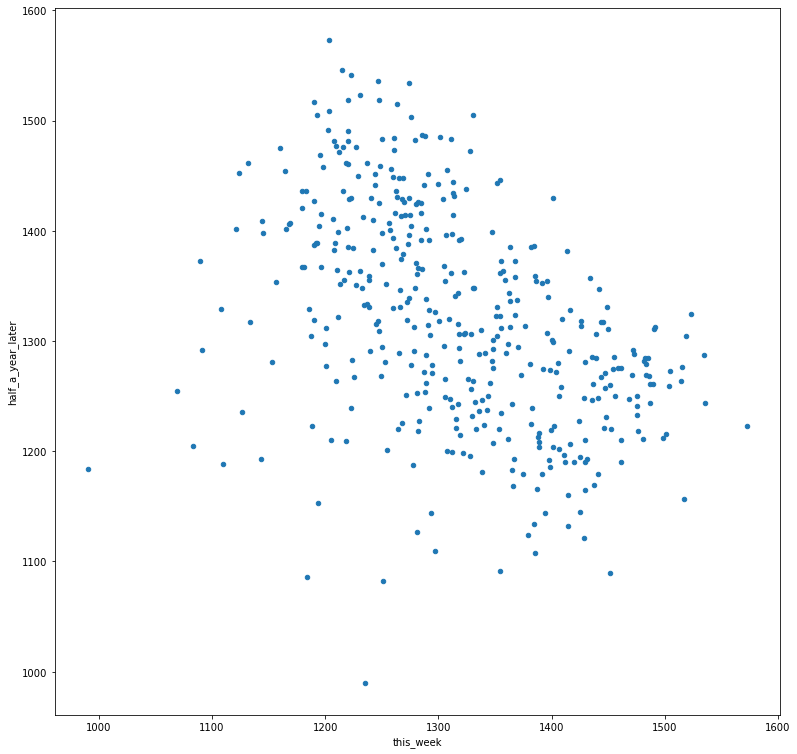

In [8]:
#lag by 26 weeks
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.Consumption.shift(-26)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

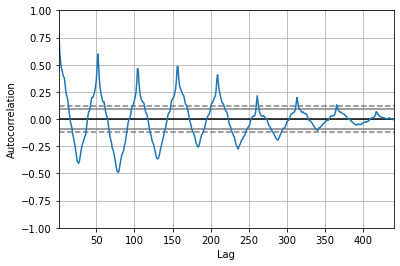

In [37]:
#Autocorrelation plot
lag = 1
weekly = train.resample('W').mean()
s = pd.Series({
    lag: stats.pearsonr(
        weekly.Consumption.iloc[:-lag], weekly.Consumption.shift(-lag).dropna()
    )[0]
    for lag in range(1, 52*3 + 1)
})
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())

<AxesSubplot:xlabel='Date'>

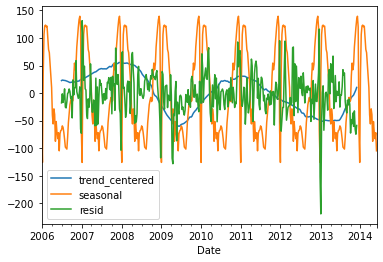

In [40]:
#Seasonal Decomposition plot
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot()

<AxesSubplot:xlabel='Date'>

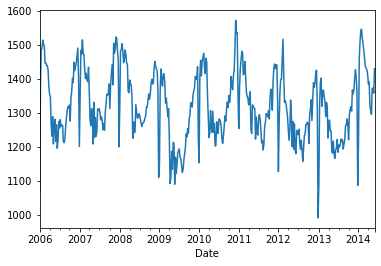

In [41]:
decomposition.y.plot()

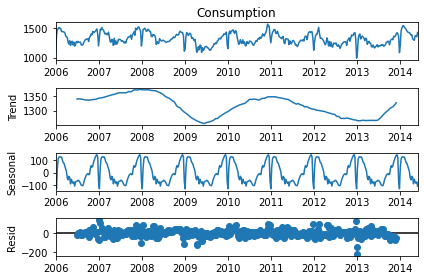

In [42]:
result.plot()
None

In [59]:
#train = train.drop(columns='y(t + 1)')
train['consump_bin'] = pd.qcut(train.Consumption, 3, labels=['low', 'moderate', 'high'])
train.groupby('consump_bin').resample('M').size().unstack(-1)


Date        consump_bin
2006-01-31  low             5
            moderate        6
            high           20
2006-02-28  low             4
            moderate        4
                           ..
2014-04-30  moderate        0
            high           20
2014-05-31  low             9
            moderate        1
            high           16
Length: 303, dtype: int64

In [70]:
table = train.groupby('consump_bin').resample('M').size().unstack(0)
table.apply(lambda row: row / row.sum(), axis=1)

TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [51]:
train.head()

,Consumption,Wind,Solar,Wind+Solar,month,year,consump_bin
Date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01-Jan,2006,low
2006-01-02,1380.521,0.0,0.0,0.0,01-Jan,2006,moderate
2006-01-03,1442.533,0.0,0.0,0.0,01-Jan,2006,high
2006-01-04,1457.217,0.0,0.0,0.0,01-Jan,2006,high
2006-01-05,1477.131,0.0,0.0,0.0,01-Jan,2006,high


In [66]:
ax = (train.groupby('consump_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area(title='consumption bin over time', ylabel='% of the month'))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.yaxis.set_major_formatter('{:.0%}'.format)

TypeError: <lambda>() got an unexpected keyword argument 'axis'